# Funciones de distribución uniforme de probabilidades

## Distribución Uniforme

In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
a = 1
b = 100
n = 2000000
data = np.random.uniform(a, b, n)
data

array([ 6.09170916, 29.36155212, 31.0739858 , ..., 52.92438835,
       67.43815854,  7.16181932])

(array([200165., 200705., 200073., 199646., 200435., 200123., 199308.,
        200529., 199031., 199985.]),
 array([ 1.00001857, 10.90000487, 20.79999117, 30.69997747, 40.59996377,
        50.49995007, 60.39993638, 70.29992268, 80.19990898, 90.09989528,
        99.99988158]),
 <BarContainer object of 10 artists>)

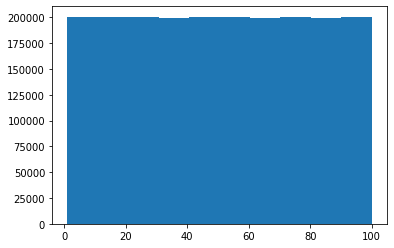

In [4]:
%matplotlib inline
plt.hist(data)

## Distribución Normal (Campana de Gauss)

In [5]:
data = np.random.randn(1000000)
data

array([-0.66706396,  1.35160884,  0.36483729, ..., -1.56521097,
        0.49590595,  0.32922357])

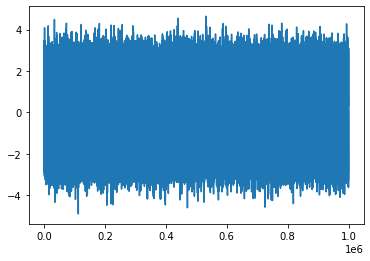

In [6]:
x = range(1,1000001)
plt.plot(x, data)

(array([4.60000e+01, 1.35700e+03, 1.91420e+04, 1.17861e+05, 3.09258e+05,
        3.47403e+05, 1.67224e+05, 3.45450e+04, 3.04300e+03, 1.21000e+02]),
 array([-4.91016671, -3.9545477 , -2.99892868, -2.04330967, -1.08769065,
        -0.13207164,  0.82354738,  1.77916639,  2.73478541,  3.69040442,
         4.64602343]),
 <BarContainer object of 10 artists>)

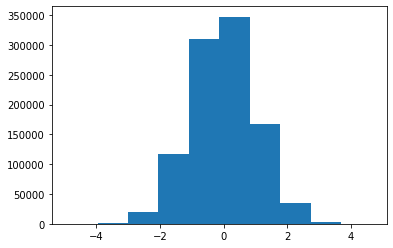

In [7]:
plt.hist(data)

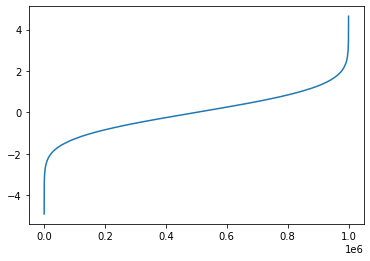

In [8]:
plt.plot(x, sorted(data))

En este caso si ordenan los datos, sale la función de distribución acumulada.  
Las fucniones gaussianas tienen esta forma, ya que al principio crece poco y al final crece bastante.

(array([2.000e+00, 3.400e+01, 2.390e+02, 1.107e+03, 2.634e+03, 3.243e+03,
        2.020e+03, 6.190e+02, 9.600e+01, 6.000e+00]),
 array([-5.53053013, -3.44478839, -1.35904666,  0.72669507,  2.81243681,
         4.89817854,  6.98392027,  9.069662  , 11.15540374, 13.24114547,
        15.3268872 ]),
 <BarContainer object of 10 artists>)

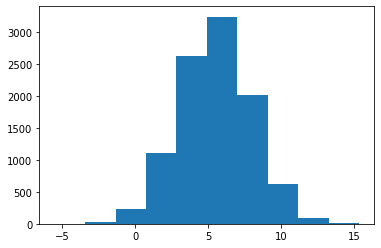

In [9]:
mu = 5.5
sd = 2.5
## La normal (distribución de 1000 valores)
z = np.random.randn(10000) 

## z= (x - mu) / sd --> N(0,1), X = mu+sd*Z

data = mu + sd * z    
plt.hist(data)

In [10]:
## Genera dos muestras cada una con 4 valores
data = np.random.randn(2, 4)
data

array([[ 0.79867811,  0.60528593,  2.17747757, -1.83230218],
       [ 0.03781254, -0.29314441, -0.32948935,  1.12147493]])

### La simulación de Monte Carlo
Para encontrar el valor de Pi

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio del resultado de cada uno de los 100 experimentos anteriores para dar un valor final de π.
    

In [11]:
def pi_montecarlo(n, number_exps):
    pi_values_list = list()

    for i in range(number_exps):
        value : float = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            x_value : float = pow(x[j], 2)
            y_value : float = pow(y[j], 2)
            z = np.sqrt(x_value + y_value)
            if z <= 1:
                value += 1
        ## pi = 4/n 
        pi_value = value * 4 / n
        pi_values_list.append(pi_value)

    ## pi avg
    pi = sum(pi_values_list)/number_exps

    return pi, plt.plot(pi_values_list)

(3.1417159999999997, [<matplotlib.lines.Line2D at 0x7f73d87d67d0>])

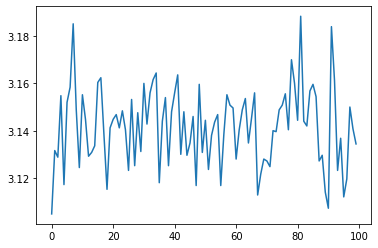

In [12]:
pi_montecarlo(10000, 100)

### Dummy Data Sets

In [19]:
n = 1000000

data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        ## 1.5 mean, 2.5 sd
        'B': 1.5 + 2.5 * np.random.randn(n),
        'C': np.random.uniform(5,32, n)
    }
)

data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000672,1.500098,18.505710
std,0.999937,2.498642,7.798648
min,-5.073450,-11.004076,5.000009
25%,-0.673055,-0.187818,11.749812
50%,-0.000777,1.500654,18.497554
75%,0.675641,3.185787,25.273250
max,5.585214,12.975178,31.999996


* **Una distribucion normal**, tiene como media 0 y como sd 1
* **Una distribucion normal**, se le puede indicar la media que se quiere con la formula:  
        *Z = mean + sd x valores*
* **Una distribución uniforme**, tiene como media el valor medio de la distribución, obtenido por:  
        *nmin + (nmax - nmin) / 2*

(array([4.20000e+01, 1.59300e+03, 2.85330e+04, 1.78383e+05, 3.92206e+05,
        3.05970e+05, 8.48420e+04, 8.15500e+03, 2.71000e+02, 5.00000e+00]),
 array([-5.07345033, -4.00758385, -2.94171738, -1.87585091, -0.80998444,
         0.25588204,  1.32174851,  2.38761498,  3.45348146,  4.51934793,
         5.5852144 ]),
 <BarContainer object of 10 artists>)

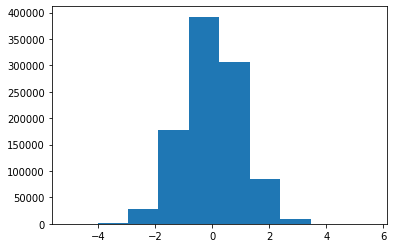

In [25]:
## Se puede ver como es una distribución normal
plt.hist(data["A"])

(array([3.90000e+01, 9.80000e+02, 1.55420e+04, 1.05626e+05, 2.96138e+05,
        3.56017e+05, 1.82276e+05, 3.96180e+04, 3.62700e+03, 1.37000e+02]),
 array([-11.0040757 ,  -8.60615032,  -6.20822494,  -3.81029956,
         -1.41237417,   0.98555121,   3.38347659,   5.78140197,
          8.17932735,  10.57725273,  12.97517811]),
 <BarContainer object of 10 artists>)

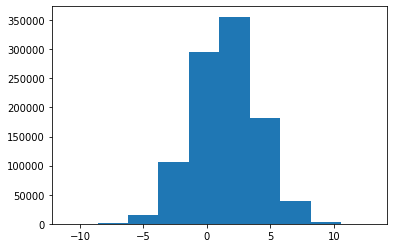

In [27]:
## Se puede ver como es una distribución normal, pero con un +1.5 de desviación tipica
plt.hist(data["B"])

(array([ 99780., 100166.,  99984.,  99915., 100273.,  99935.,  99428.,
         99857., 100141., 100521.]),
 array([ 5.00000888,  7.70000758, 10.40000627, 13.10000497, 15.80000366,
        18.50000236, 21.20000106, 23.89999975, 26.59999845, 29.29999714,
        31.99999584]),
 <BarContainer object of 10 artists>)

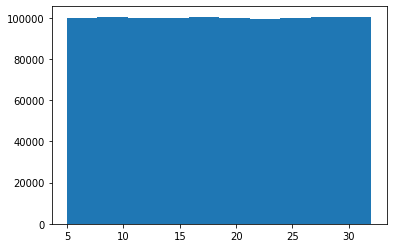

In [26]:
## Se puede ver como es una distribución uniforme
plt.hist(data["C"])

In [29]:
data = pd.read_csv("../../datasets/customer-churn-model/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [30]:
colum_names = data.columns.values.tolist()
a = len(colum_names)

In [33]:
new_data = pd.DataFrame(
    {
        "Column Name": colum_names,
        "A": np.random.randn(a),
        "B": np.random.uniform(0, 1, a)
    }, index= range(42, 42+a)
)

new_data

,Column Name,A,B
42,State,0.360486,0.887547
43,Account Length,0.554607,0.221906
44,Area Code,0.455474,0.763198
45,Phone,0.730989,0.121423
46,Int'l Plan,-1.602908,0.657361
47,VMail Plan,-0.914343,0.916092
48,VMail Message,-0.123100,0.713537
49,Day Mins,-0.841849,0.533598
50,Day Calls,1.009345,0.178823
51,Day Charge,-0.641388,0.520294
